# **1. Initialization**

 - Mounting to google drive
 - Installing necessary libraries

In [48]:
"""
Mounting colab file to drive to access the dataset
"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
"""
Installing the catboost library into colab
"""
!pip install catboost

In [50]:
"""
Importing the necessary libraries for the entire file
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler ,RobustScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# **2. Exploratory Data Analysis (EDA)**

 - Getting general information about the dataset
 - Size, general statistics, missing values
  - Overall heatmap
 - Column renaming

In [51]:
"""
Creating variable called df, and setting it to the dataset found at the specified path
Displays first 5 rows of dataframe

Uses pandas
"""
df = pd.read_csv('/content/drive/MyDrive/DATASCI_3000_Course_Project/dataset.csv')
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.433
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.359
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.338
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.400
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.522


In [52]:
"""
Gives summary of dataset, info such as dataset size, the columns, datatypes, missing values

Uses pandas
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [53]:
"""
Gives summary of statistics for the numeric columns of the dataset

Uses pandas
"""
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,958524.000,952261.000,136209.000,135103.000,136081.000,958524.000,958524.000,958524.000,958524.000,958524.000,...,938602.000,938602.000,938602.000,938602.000,938602.000,938598.000,938602.000,938602.000,938598.000,958522.000
mean,3810113.989,16.906,5.506,0.131,0.479,2458869.282,58868.782,20196925.052,0.156,2.902,...,19.829,1.168,5.310,1370061.639,1369977.227,21.315,0.051,431278021.002,85258.150,0.561
std,6831540.880,1.790,9.425,0.110,0.783,701.672,701.672,19303.537,0.093,39.720,...,2903.785,128.223,1333.381,915899566.238,915899068.401,7197.034,9.815,295304579371.807,27676810.590,2.746
min,2000001.000,-1.100,0.003,0.001,0.001,2425051.500,25051.000,19270620.000,0.000,-14702.448,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2239631.750,16.100,2.780,0.053,0.180,2459000.500,59000.000,20200531.000,0.092,2.388,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.518
50%,2479262.500,16.900,3.972,0.079,0.332,2459000.500,59000.000,20200531.000,0.145,2.647,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.566
75%,3752517.750,17.714,5.765,0.190,0.620,2459000.500,59000.000,20200531.000,0.201,3.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.614
max,54017232.000,33.200,939.400,1.000,140.000,2459000.500,59000.000,20200531.000,1.855,33488.896,...,1015000.000,55330.000,1199100.000,884510000000.000,884510000000.000,5509700.000,7698.800,285310000000000.000,19107000000.000,2686.600


In [54]:
"""
Checks every cell in dataframe for missing/NaN values, then sums up the number of missing values per column
Then find total number of rows in dataframe, and divide missing count by total rows to get percent of missing values

Uses pandas
"""
print("Missing value percentage in each column")
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Missing value percentage in each column


,0
prefix,99.998
name,97.698
albedo,85.905
diameter_sigma,85.803
diameter,85.790
sigma_per,2.079
sigma_ad,2.079
sigma_om,2.078
sigma_ma,2.078
sigma_q,2.078


<Axes: >

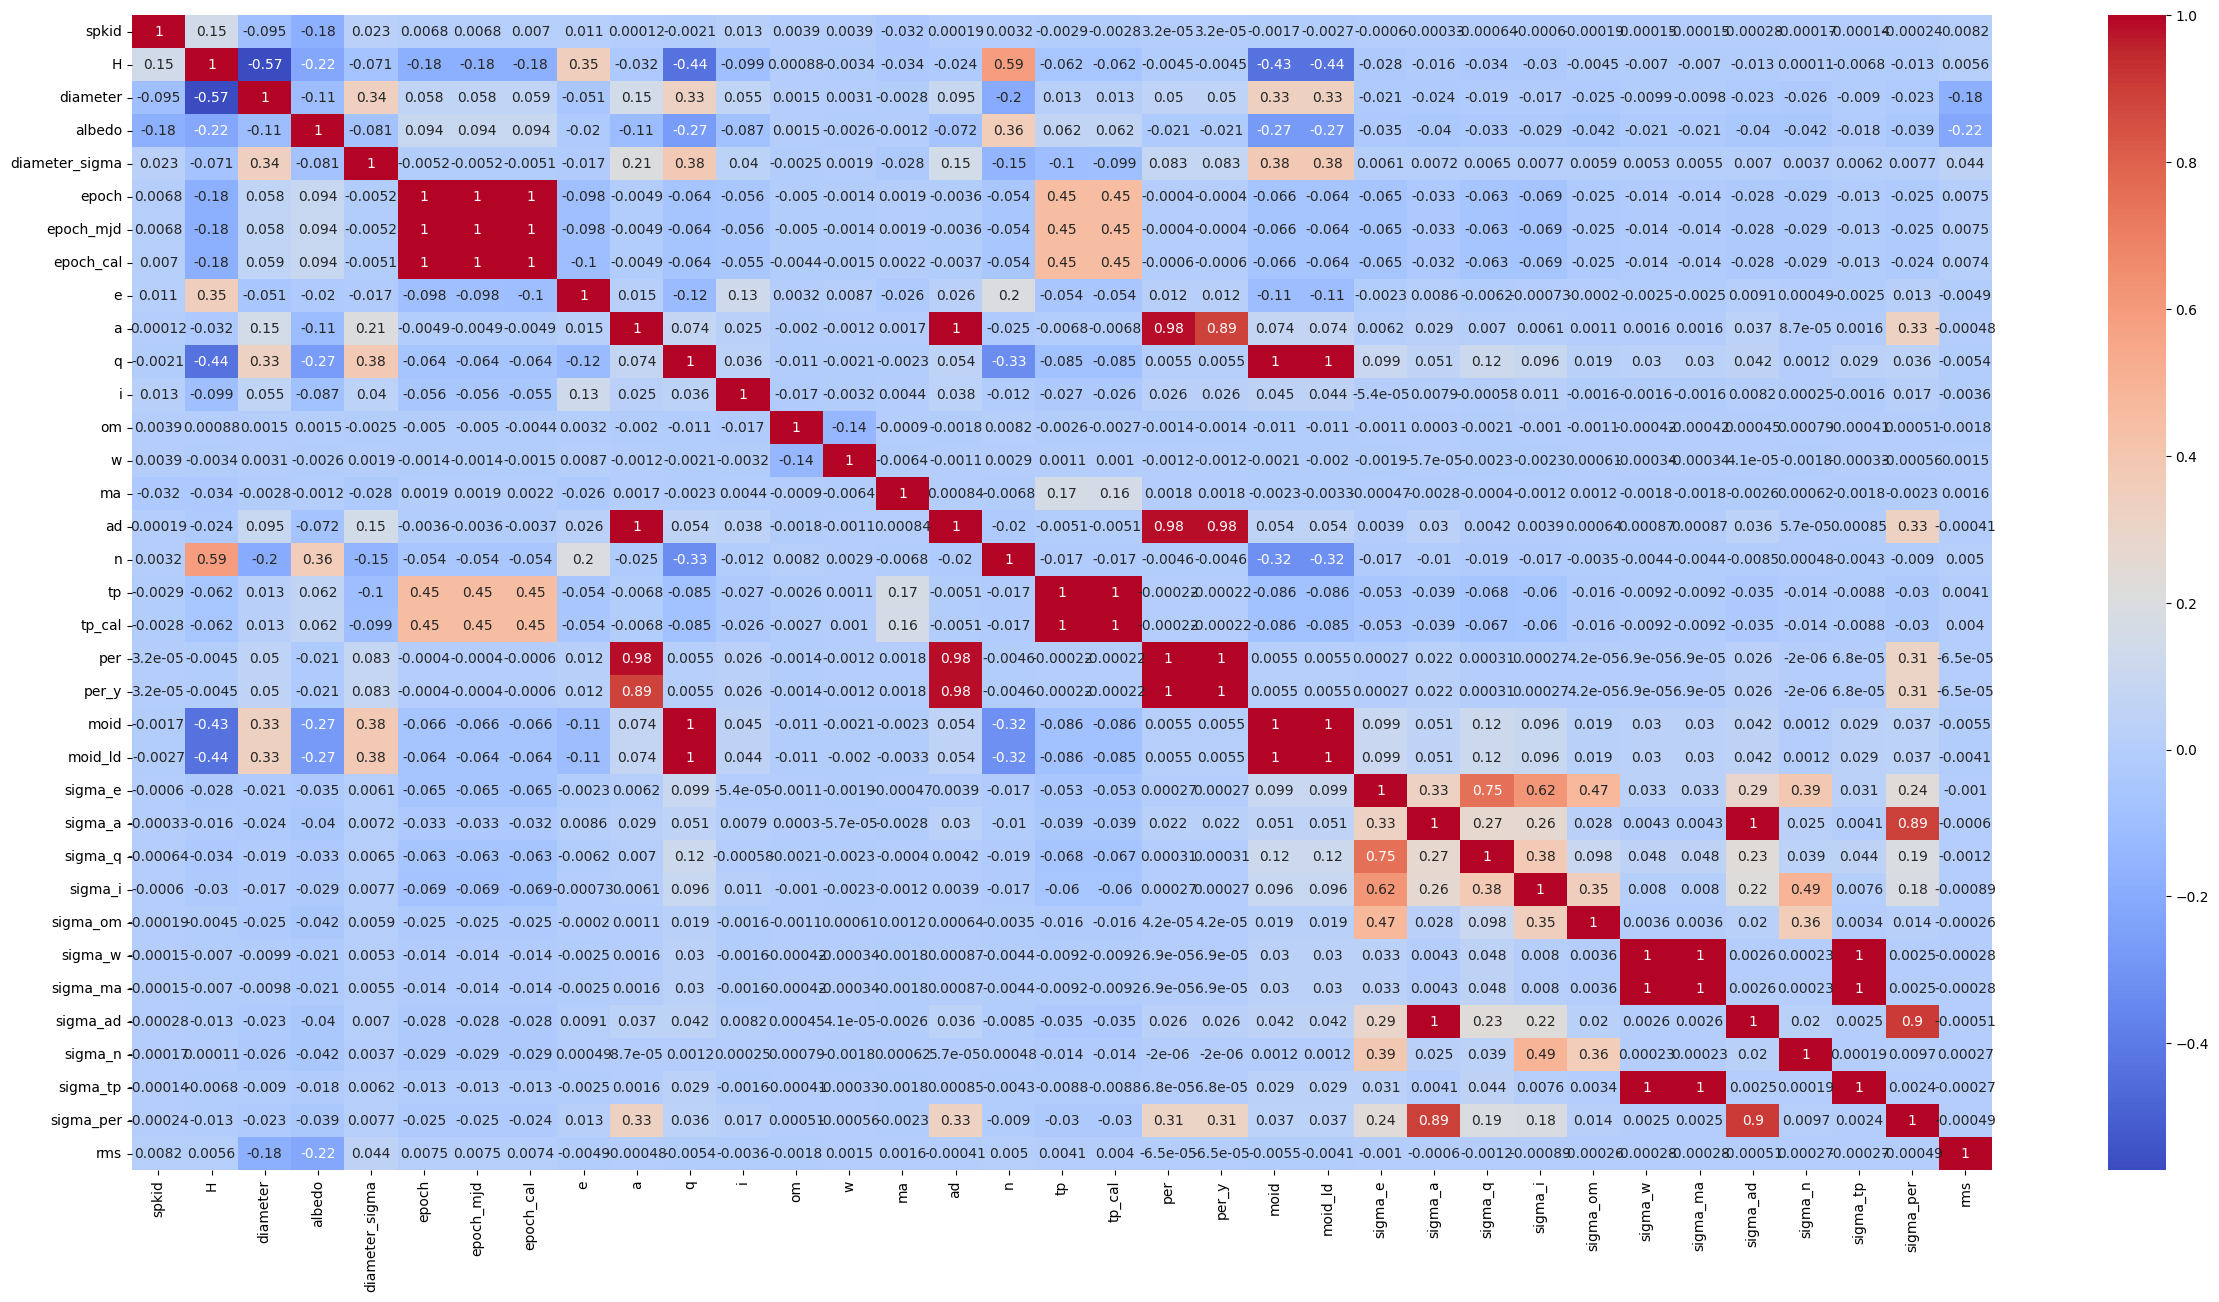

In [55]:
"""
Selects all numeric columns in the dataframe
Computes their correlations with distance
Displays a heatmap of how each column relates to the diameter

Uses seaborn, pandas, matplotlib.pyplot
"""
nummeric_data = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
plt.figure(figsize=(30,15))
sns.heatmap(nummeric_data.corr(), annot=True, cmap="coolwarm")

In [56]:
"""
Dropping specified columns from the dataframe, but keeping the original dataframe intact, axis=1 drop columns instead of rows
Returning the names of the remaining columns after the others have

Uses pandas
"""
df = df.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'orbit_id','epoch','equinox',
           'epoch_mjd', 'epoch_cal','i', 'om', 'w','ma','tp', 'tp_cal', 'per', 'per_y','sigma_e', 'sigma_a',
           'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w','sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'],axis=1)

df.columns

Index(['neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'e', 'a',
       'q', 'ad', 'n', 'moid', 'moid_ld', 'class', 'rms'],
      dtype='object')

In [57]:
"""
Creates a disctionary to rename specified columns in the dataframe
Allows for more readable column names
Assign the dictionary names to the corresponding columns, but assigning back to df ensures changes are permanent
Print the new column names after renaming

Uses pandas
"""
col_rename = {'neo':'is_near',
              'pho':'is hazarous',
              'H':'brightness',
              'albedo':'reflectivity',
              'diameter_sigma':'diameter_error',
              'e':'orbit_eccentricity',
              'a':'semi_major_axis',
              'q':'perihelion_dist',
              'ad':'aphelion_dist',
              'n':'orbital_speed',
              }
df=df.rename(columns = col_rename)
df.columns


Index(['is_near', 'pha', 'brightness', 'diameter', 'reflectivity',
       'diameter_error', 'orbit_eccentricity', 'semi_major_axis',
       'perihelion_dist', 'aphelion_dist', 'orbital_speed', 'moid', 'moid_ld',
       'class', 'rms'],
      dtype='object')

In [58]:
"""
Printing the first 5 dataframe rows after column drops and column renaming

Uses pandas
"""
df.head()

,is_near,pha,brightness,diameter,reflectivity,diameter_error,orbit_eccentricity,semi_major_axis,perihelion_dist,aphelion_dist,orbital_speed,moid,moid_ld,class,rms
0,N,N,3.400,939.400,0.090,0.200,0.076,2.769,2.559,2.980,0.214,1.595,620.641,MBA,0.433
1,N,N,4.200,545.000,0.101,18.000,0.230,2.774,2.136,3.412,0.213,1.234,480.349,MBA,0.359
2,N,N,5.330,246.596,0.214,10.594,0.257,2.668,1.983,3.354,0.226,1.034,402.515,MBA,0.338
3,N,N,3.000,525.400,0.423,0.200,0.089,2.361,2.152,2.571,0.272,1.139,443.451,MBA,0.400
4,N,N,6.900,106.699,0.274,3.140,0.191,2.574,2.083,3.065,0.239,1.096,426.433,MBA,0.522


# **3. Preprocessing**
  - Setting diameter as target variable
  - Heatmap after dropping irrelevant columns
  - Filling missing values
  - Outlier detection and handling
  - Feature and diamter scatterplots
  - Determining feature importance for diameter prediction
  - Data splitting, labelling, and encoding

In [59]:
"""
Dropping rows with missing values from the diameter column
Printing the shape of the dataframe after dropping the rows

Uses pandas
"""
df = df.dropna(subset = ["diameter"])
print("(rows, columns) of the dataset: ")
df.shape

(rows, columns) of the dataset: 


(136209, 15)

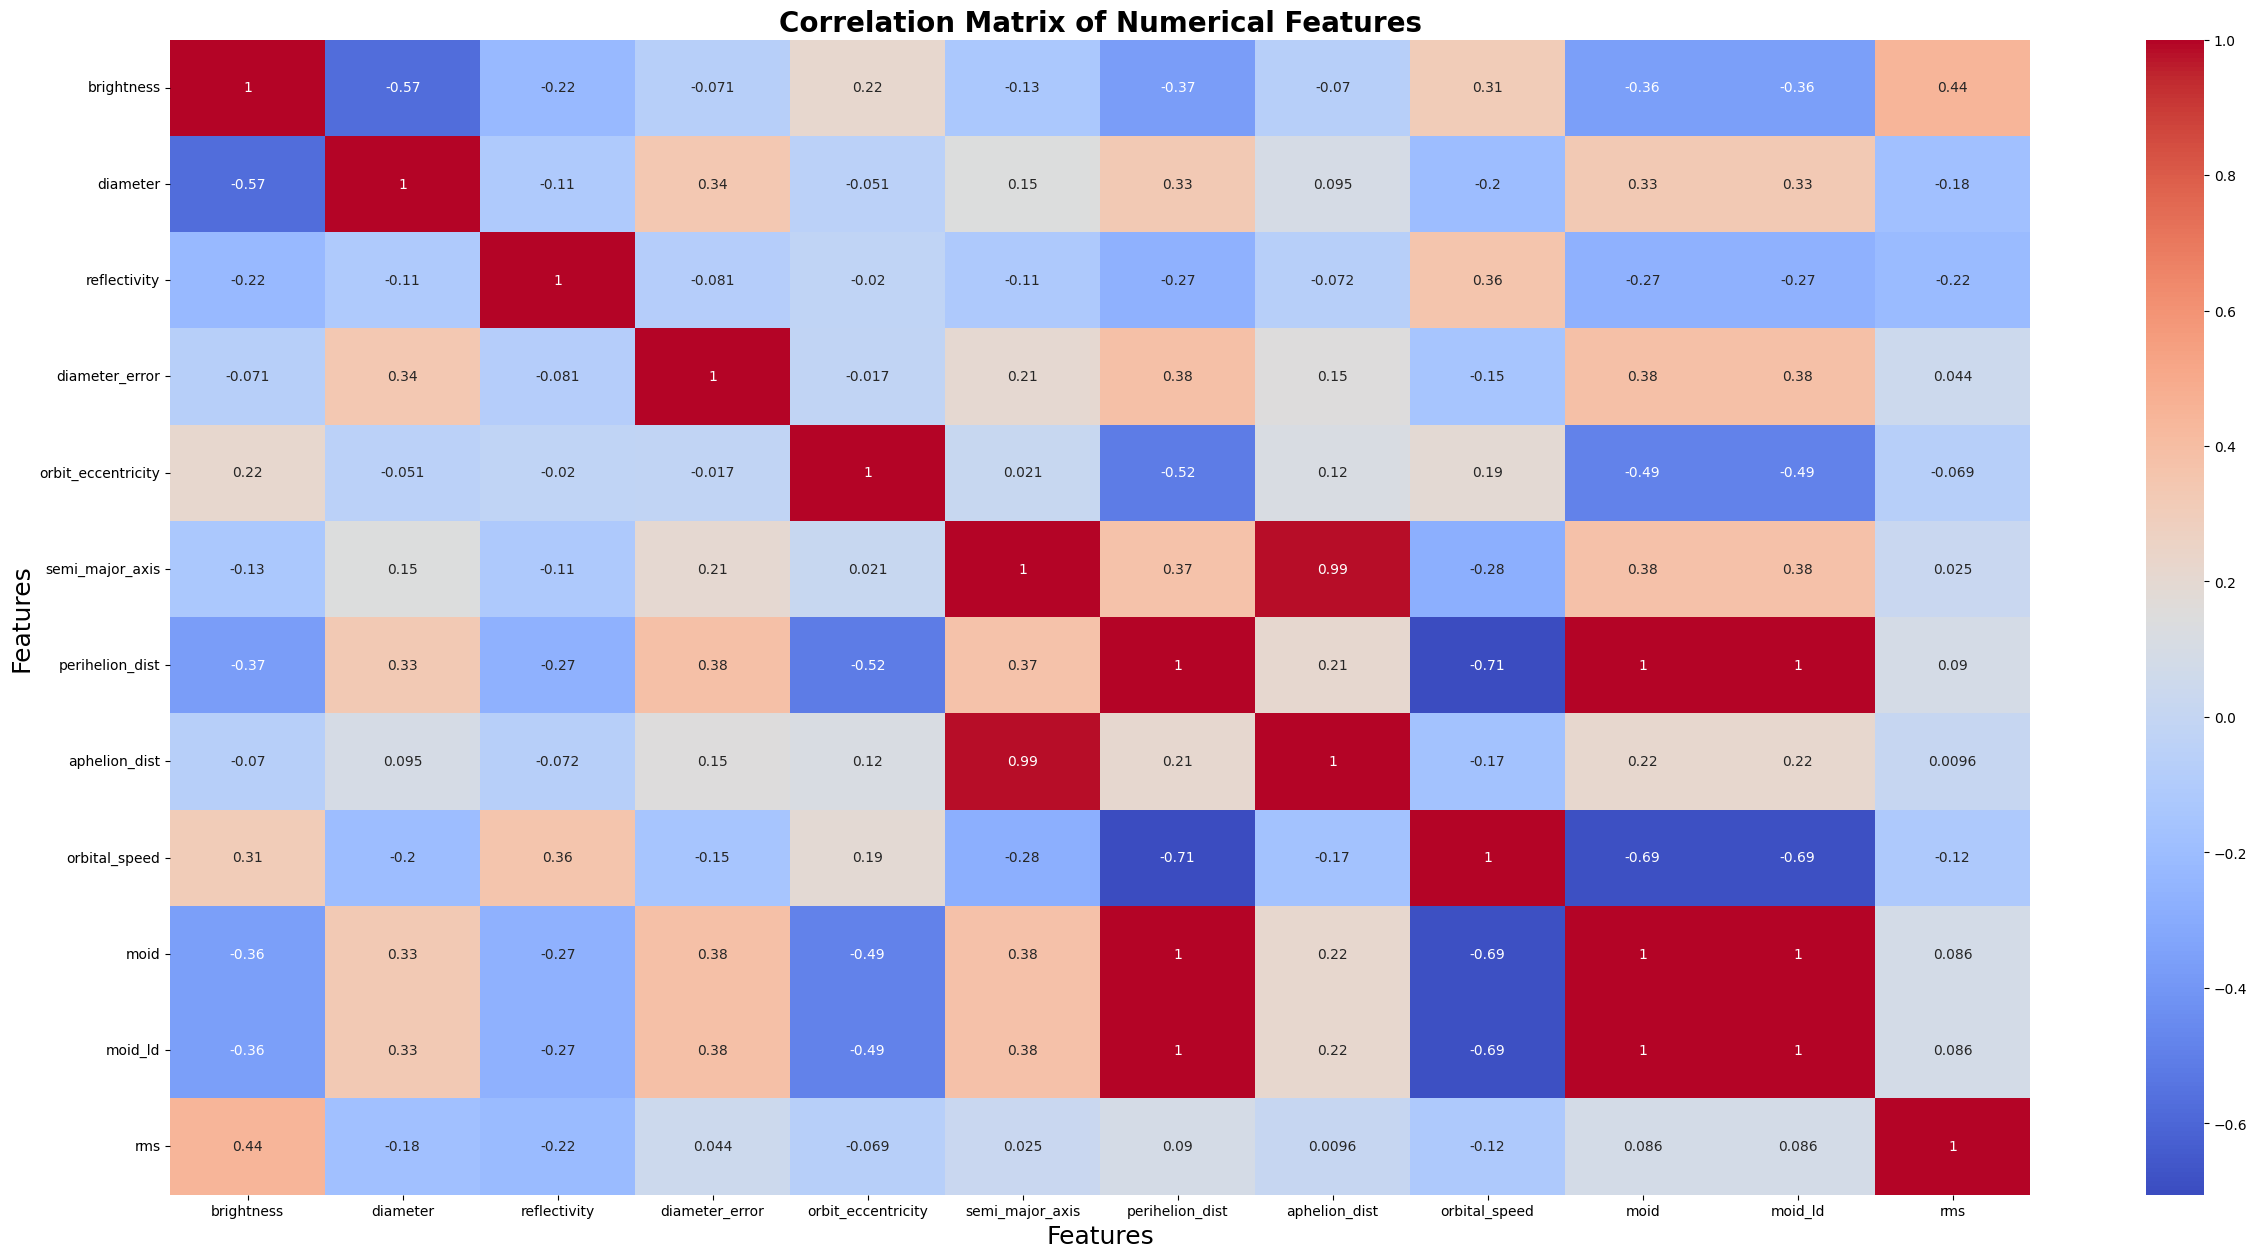

In [60]:
"""
Finds all non-numeric columns and removes them
Computes correlations between all numeric features
Displays a heatmap of the correlations

Uses seaborn, pandas, matplotlib.pyplot
"""
nummeric_data = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
plt.figure(figsize=(30,15))
sns.heatmap(nummeric_data.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Matrix of Numerical Features", fontsize=20, fontweight='bold')
plt.xlabel("Features", fontsize=18)
plt.ylabel("Features", fontsize=18)

plt.show()

In [61]:
"""
Gives summary of statistics for the numeric columns of the dataset

Uses pandas
"""
df.describe()

,brightness,diameter,reflectivity,diameter_error,orbit_eccentricity,semi_major_axis,perihelion_dist,aphelion_dist,orbital_speed,moid,moid_ld,rms
count,132045.000,136209.000,135100.000,136081.000,136209.000,136209.000,136209.000,136209.000,136209.000,136209.000,136209.000,136209.000
mean,15.132,5.506,0.131,0.479,0.146,2.819,2.406,3.232,0.219,1.424,554.123,0.544
std,1.388,9.425,0.110,0.783,0.077,1.496,0.517,2.840,0.057,0.513,199.655,0.074
min,3.000,0.003,0.001,0.001,0.000,0.626,0.082,1.000,0.000,0.000,0.010,0.054
25%,14.400,2.780,0.053,0.180,0.090,2.543,2.072,2.871,0.181,1.086,422.724,0.509
50%,15.200,3.972,0.079,0.332,0.139,2.755,2.369,3.174,0.216,1.390,540.783,0.544
75%,16.000,5.765,0.190,0.620,0.191,3.095,2.688,3.473,0.243,1.702,662.523,0.579
max,29.900,939.400,1.000,140.000,0.984,376.133,40.318,746.169,1.989,39.360,15317.848,7.725


In [62]:
"""
Checks every cell in dataframe for missing/NaN values
Sumns up all 'True' values in each column
Divides missing count by total number of rows to get percent of missing rows
Sorting from highest to lowest, to put rows with most missing data at the top

Uses pandas
"""
print("Missing value percentage in each column after dropping the diameter nulls :")
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Missing value percentage in each column after dropping the diameter nulls :


,0
brightness,3.057
reflectivity,0.814
diameter_error,0.094
pha,0.000
is_near,0.000
diameter,0.000
orbit_eccentricity,0.000
semi_major_axis,0.000
perihelion_dist,0.000
aphelion_dist,0.000


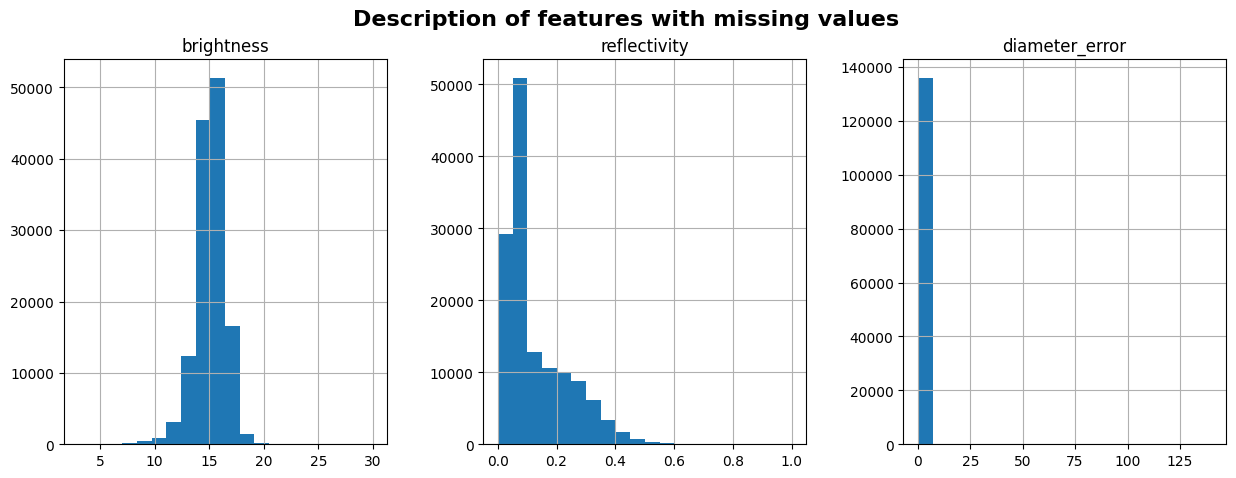

In [63]:
"""
Selects features that still have still have some missing values
Plots histograms of those features to see the distribution of their values

Uses mayplotlib.pyplot and pandas
"""
cols = ['brightness', 'reflectivity', 'diameter_error']
df[cols].hist(bins=20, figsize = (15,5), layout = (1,3))
plt.suptitle("Description of features with missing values", fontsize = 16, fontweight = "bold")

plt.show()

 - Brightness is approximately normally distributed, so the missing values can be approximated using the values mean
  - Reflectivity and diameter_error are right side skewed, so the missing values can be approximated using the values median

In [64]:
"""
Fill missing values in brightness column wiht the mean to not affect the spread too much
Fill missing values in reflectivity and diameter error columns with the median to not affect the spread too much

Uses pandas
"""
df['brightness'] = df['brightness'].fillna(df['brightness'].mean())
df['reflectivity'] = df['reflectivity'].fillna(df['reflectivity'].median())
df['diameter_error']  = df['diameter_error'].fillna(df['diameter_error'].median())

print(f"Number of missing values:")
print(df.isna().sum())

Number of missing values:
is_near               0
pha                   0
brightness            0
diameter              0
reflectivity          0
diameter_error        0
orbit_eccentricity    0
semi_major_axis       0
perihelion_dist       0
aphelion_dist         0
orbital_speed         0
moid                  0
moid_ld               0
class                 0
rms                   0
dtype: int64


In [65]:
"""
Making function called outlier report that takes in numeric columns and determines how many outliers are in each
Computes upper and lower quartiles, and find the IQR to find the middle 50% of data
Finds lower and uppoer bounds which determine whether a value is an outlier or not
Counts how many outliers are in each column, then computes the percent of outliers per column
Adds results to list which then gets displayed as a table that has the highest outlier count at the top

Uses pandas
"""
def outlier_report (cols):
    outlier_data = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR

        outlier_count = ((df[col]<lower_bound)|(df[col]>upper_bound)).sum()
        outlier_per = (outlier_count/len(df))*100
        outlier_data.append([col,outlier_count,outlier_per])

    outlier_df = pd.DataFrame(outlier_data,columns=['Column','Outliers Count','Outliers %'])
    outlier_df = outlier_df.sort_values(by ='Outliers Count',ascending=False)
    print(outlier_df.to_string(index=False))

num_cols=df.select_dtypes('number')
outlier_report(num_cols)

            Column  Outliers Count  Outliers %
          diameter            9613       7.058
    diameter_error            6878       5.050
               rms            4954       3.637
      reflectivity            3809       2.796
     aphelion_dist            3567       2.619
        brightness            3532       2.593
   semi_major_axis            3423       2.513
     orbital_speed            3253       2.388
   perihelion_dist            2708       1.988
              moid            2552       1.874
           moid_ld            2552       1.874
orbit_eccentricity            1503       1.103


In [66]:
"""
Finding the diameter column outliers
Finds lower and upper quartiles then finds IQR
IQR used to find upper adn lower bounds for outliers
Removes rows with outliers
Prints the shape of the dataframe after dropping the outliers (rows, columns)

Uses pandas
"""
Q1 = df['diameter'].quantile(0.25)
Q3 = df['diameter'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['diameter']>lower_bound)&(df['diameter']<upper_bound)]

print(f" Shape after droping the diameter column outliers : {df.shape}")

 Shape after droping the diameter column outliers : (126596, 15)


In [67]:
"""
Finds quartiles, then finds IQR
IQR used to find upper adn lower bounds for outliers
Caps outliers bvy replacing them with the upper and lower bounds

Uses pandas
"""
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, np.where(df[col] > upper_bound, upper_bound, df[col]))

outlier_report(num_cols)

            Column  Outliers Count  Outliers %
        brightness               0       0.000
          diameter               0       0.000
      reflectivity               0       0.000
    diameter_error               0       0.000
orbit_eccentricity               0       0.000
   semi_major_axis               0       0.000
   perihelion_dist               0       0.000
     aphelion_dist               0       0.000
     orbital_speed               0       0.000
              moid               0       0.000
           moid_ld               0       0.000
               rms               0       0.000


In [68]:
"""
Finds all columns of object datatype and lops through them
Finds how many times each unique value appears in each column
Prints the results

Uses pandas
"""
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in obj_cols:
    print (df[col].value_counts())

is_near
N    125751
Y       845
Name: count, dtype: int64
pha
N    126375
Y       221
Name: count, dtype: int64
class
MBA    118480
OMB      6211
IMB       564
APO       486
MCA       350
AMO       264
TJN       129
ATE        95
CEN        12
AST         3
TNO         2
Name: count, dtype: int64


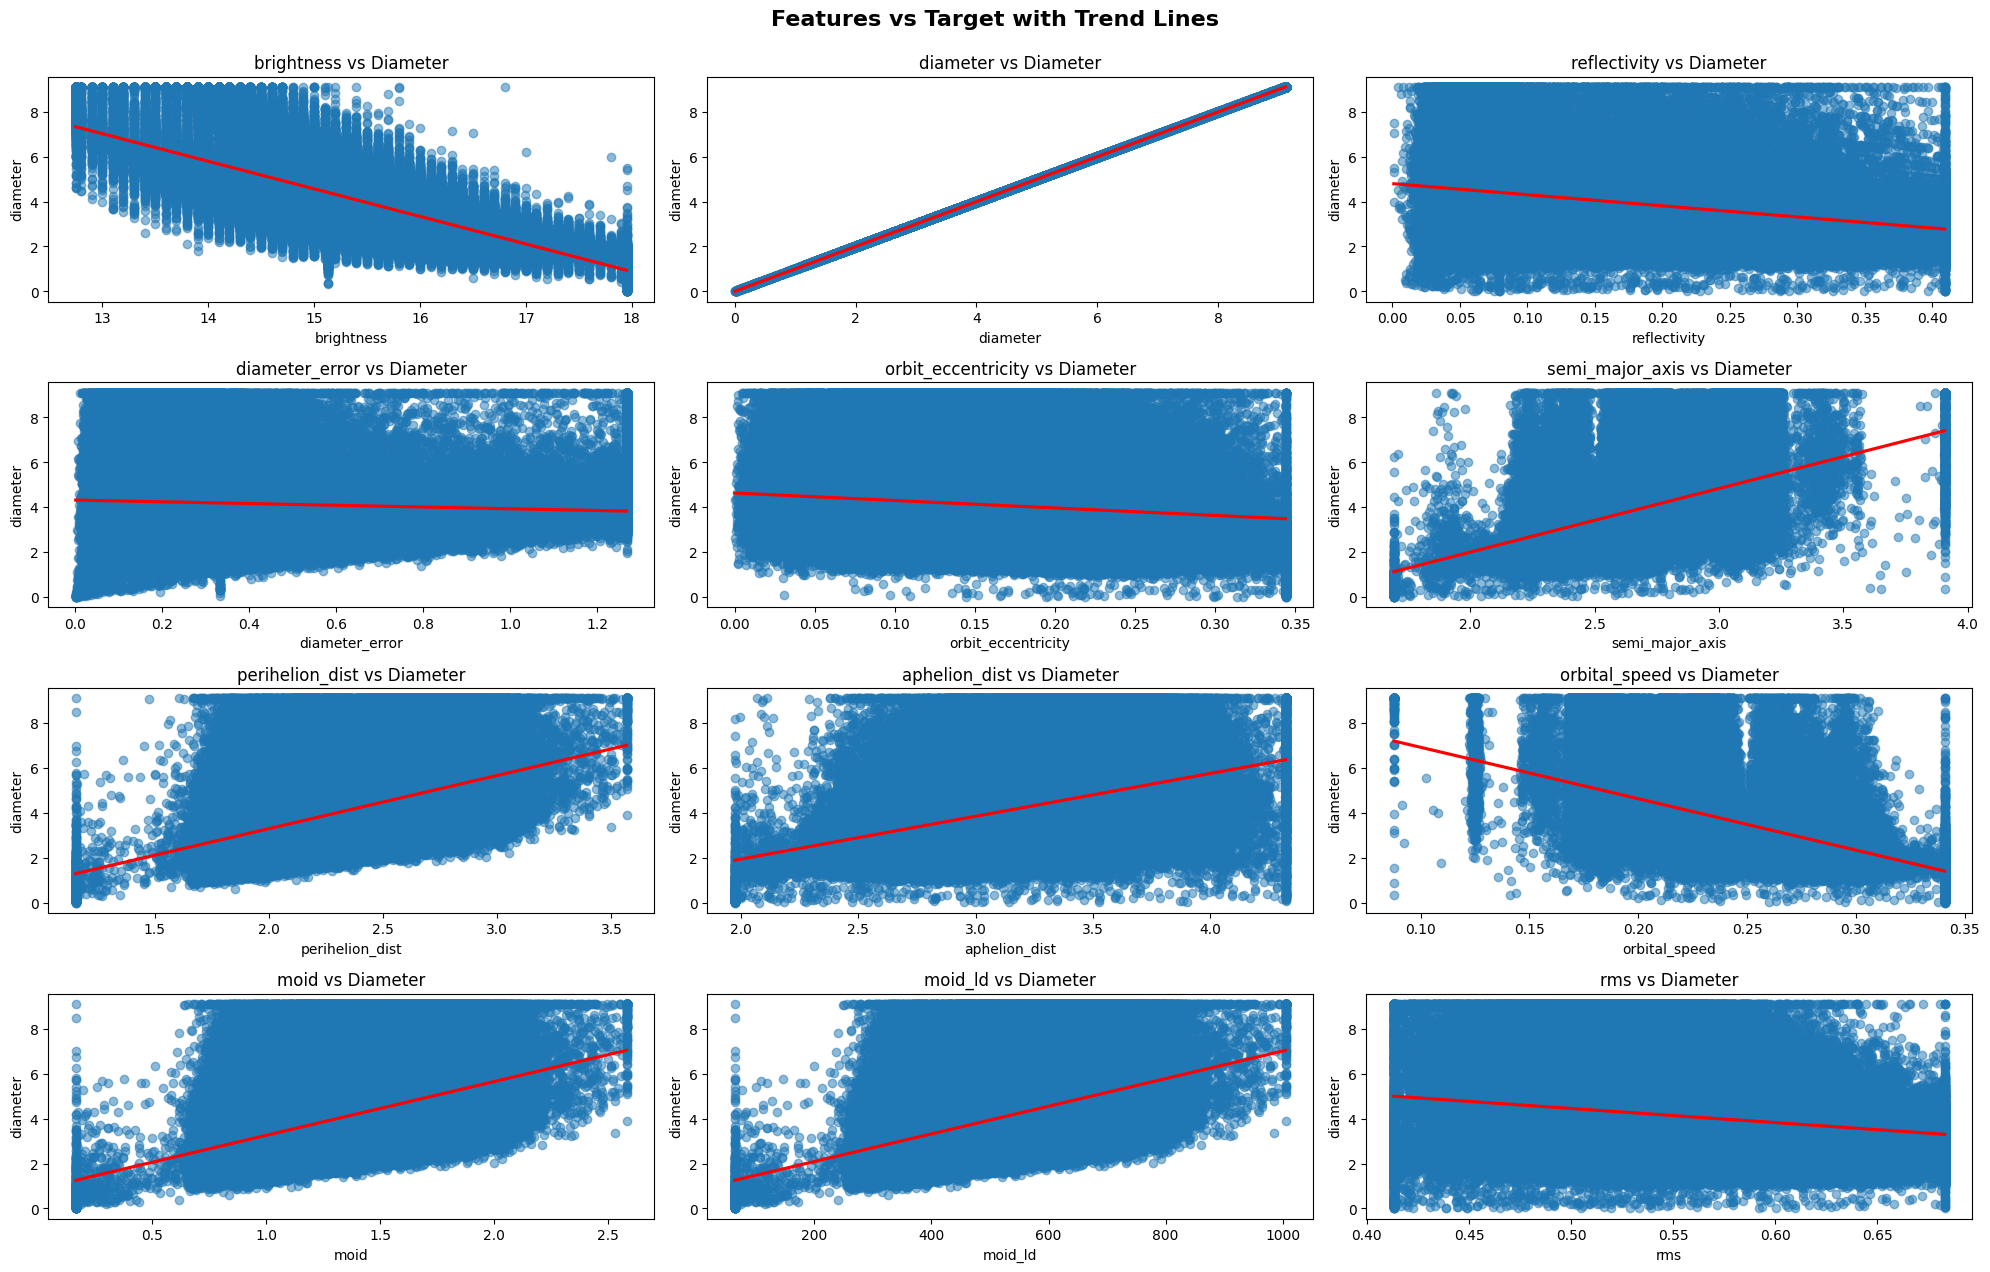

In [69]:
"""
Converts all numeric column names into list of features to plot against diameter
Sets the parameters for the figure size and the number of rows and columns for the subplots
Loops through list of numeric columns and creates a plot for each one
Plots scatterplot of feature (x axis) vs diameter (y axis)
Sets the title of the plot to the feature name
Includes a trendline to see the relationship between the feature and diameter

Uses matplotlib.pyplot, seaborn
"""
features = num_cols.columns.to_list()

rows = 5
cols_per_row = 3
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, start=1):
    plt.subplot(rows, cols_per_row, i)
    sns.regplot(x=feature,
                y=df['diameter'],
                data=df,
                scatter_kws={'alpha':0.5},
                line_kws={'color':'red'}
                )
    plt.title(f"{feature} vs Diameter")
    plt.tight_layout()

plt.suptitle("Features vs Target with Trend Lines", fontsize=16, fontweight="bold", y=1.02)

plt.show()

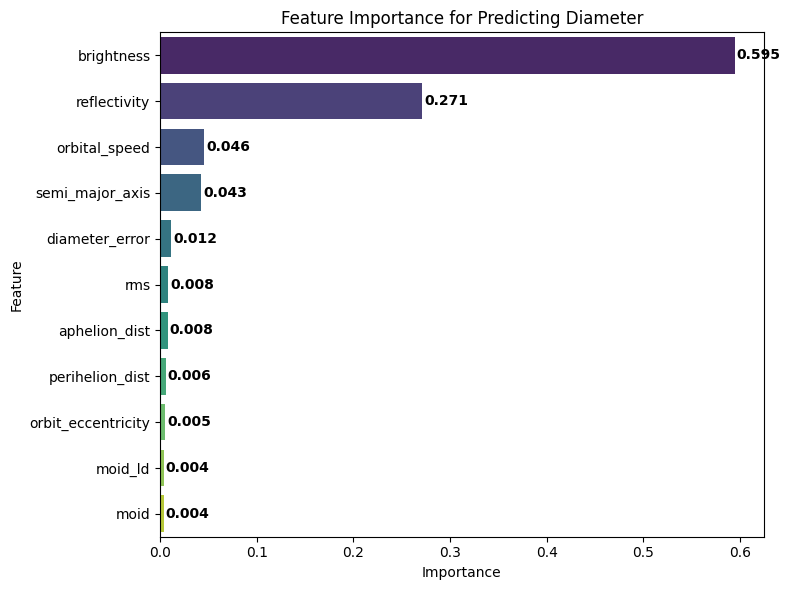

In [70]:
"""
creates list of numeric columns to use as predictors, and sets diameter as the thing we are trying to predict
Selects the relevant columns and drops rows with NANs. sets x to the input feature and y to diameter
Creates 100 estimators/decision trees with random state for reproductibility. fits model to data x and y
Gives importance of each ffeature in predicting diameter and sorts them from most to least important
Plots the results

Uses pandas, matplotlib.pyplot, seaborn, RandomForestRegressor, numpy
"""
features = ['rms', 'reflectivity', 'diameter_error', 'aphelion_dist',
            'brightness', 'semi_major_axis', 'orbital_speed', 'perihelion_dist',
            'moid', 'moid_ld', 'orbit_eccentricity']

target = 'diameter'


df_clean = df[features + [target]].dropna()
X = df_clean[features]
y = df_clean[target]

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
    )
rf.fit(X, y)


importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=importance.values, y=importance.index, palette='viridis')

for i, v in enumerate(importance.values):
    ax.text(v + 0.002,
            i,
            f"{v:.3f}",
            va='center',
            color = 'black',
            fontsize = 10,
            fontweight = 'bold')

plt.title("Feature Importance for Predicting Diameter")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [71]:
"""
sets x to all features except diamter (assigned to y)
Splits data into test size of 10%, and 90% assigned to y_temp and x_temp
Splits leftover data (x_temp, y_temp) into 70% train and 30% validation
Prints the size of each set

Uses train_test_split
"""
x = df.drop('diameter', axis=1)
y = df['diameter']


x_temp, x_test, y_temp, y_test = train_test_split(
    x, y,
    test_size=0.10,
    random_state=42
)


x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp,
    test_size=2/9,
    random_state=42
)


print("Train size:", x_train.shape)
print("Validation size:", x_val.shape)
print("Test size:", x_test.shape)


Train size: (88616, 14)
Validation size: (25320, 14)
Test size: (12660, 14)


In [72]:
"""
Prints the number of NANs in each column of the training, validation, and test sets

Uses pandas
"""
nan_table = pd.DataFrame({
    'Training set': x_train.isna().sum(),
    'Validation set': x_val.isna().sum(),
    'Test set': x_test.isna().sum()
    }
)
nan_table

,Training set,Validation set,Test set
is_near,0,0,0
pha,0,0,0
brightness,0,0,0
reflectivity,0,0,0
diameter_error,0,0,0
orbit_eccentricity,0,0,0
semi_major_axis,0,0,0
perihelion_dist,0,0,0
aphelion_dist,0,0,0
orbital_speed,0,0,0


In [73]:
"""
Loops through categorical columns, converting them to numeric codes for ML
Fits a LabelEncoder to training set to learn category-to-interger mappping
Applies same mapping to validation and test sets

Uses LabelEncoder
"""
for col in obj_cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_val[col] = le.transform(x_val[col])
    x_test[col] = le.transform(x_test[col])


In [74]:
"""
Computes mean and standard deviation of each feature in training set
Scales so each feature has zero mean and unit standard deviation
Fits on training set only
Applies scaling learned from training data to validation and test sets

Uses StandardScaler
"""
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)


# **4. Modelling**

 - Performing analysis of the training and validation sets

 Models include:

 - Linear Regression
 - Ridge Regression
 - Lasso Regression
 - Random Forest Regressor
 - XGBoost Regressor
 - Single Perceptron
 - Multi Layer Perceptron (MLP)


In [75]:
"""
Creates a linear regression model and fits it to the scaled training data
Learns best coefficients for predicting y_train from x_train_s
Uses trained model to predict values for training set
Predcits values for validation set using the same model
Finds the R^2 and RMSE for both sets

Uses LinearRegression, mean_squared_error, r2_score, numpy
"""
from sklearn.metrics import mean_absolute_error

lin = LinearRegression()
lin.fit(x_train_s, y_train)

lin_train_pred = lin.predict(x_train_s)
lin_val_pred = lin.predict(x_val_s)

lin_train_r2 = r2_score(y_train, lin_train_pred)
lin_train_rmse = np.sqrt(mean_squared_error(y_train, lin_train_pred))
lin_train_mae = mean_absolute_error(y_train, lin_train_pred)

lin_val_r2 = r2_score(y_val, lin_val_pred)
lin_val_rmse = np.sqrt(mean_squared_error(y_val, lin_val_pred))
lin_val_mae = mean_absolute_error(y_val, lin_val_pred)

print("LINEAR REGRESSION")
print(f"Train R²: {lin_train_r2:.3f}")
print(f"Train RMSE: {lin_train_rmse:.3f}")
print(f"Train MAE: {lin_train_mae:.3f}")

print(f"\nValidaton R²: {lin_val_r2:.3f}")
print(f"Validation RMSE: {lin_val_rmse:.3f}")
print(f"Validation MAE: {lin_val_mae:.3f}")

LINEAR REGRESSION
Train R²: 0.801
Train RMSE: 0.851
Train MAE: 0.625

Validaton R²: 0.796
Validation RMSE: 0.854
Validation MAE: 0.626


In [76]:
"""
Creates a Ridge regression model with alpha=1.0 to control L2 regularization
Fits model to training data, learning coefficients that minimize squared error with L2 regularization
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses Ridge, mean_squared_error, r2_score, numpy
"""
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_s, y_train)

ridge_train_pred = ridge.predict(x_train_s)
ridge_val_pred = ridge.predict(x_val_s)

ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)

ridge_val_r2 = r2_score(y_val, ridge_val_pred)
ridge_val_rmse = np.sqrt(mean_squared_error(y_val, ridge_val_pred))
ridge_val_mae = mean_absolute_error(y_val, ridge_val_pred)

print("\nRIDGE REGRESSION")
print(f"Train R²: {ridge_train_r2:.3f}")
print(f"Train RMSE: {ridge_train_rmse:.3f}")
print(f"Train MAE: {ridge_train_mae:.3f}")

print(f"\nValidaton R²: {ridge_val_r2:.3f}")
print(f"Validation RMSE: {ridge_val_rmse:.3f}")
print(f"Validation MAE: {ridge_val_mae:.3f}")


RIDGE REGRESSION
Train R²: 0.801
Train RMSE: 0.851
Train MAE: 0.625

Validaton R²: 0.796
Validation RMSE: 0.854
Validation MAE: 0.626


In [77]:
"""
Creates Lasso regression model with alpha=0.1 to control L1 regularization
Fits model to training data, learning coefficients that minimize squared error with L1 regularization
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses Lasso, mean_squared_error, r2_score, numpy
"""
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_s, y_train)

lasso_train_pred = lasso.predict(x_train_s)
lasso_val_pred = lasso.predict(x_val_s)

lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)

lasso_val_r2 = r2_score(y_val, lasso_val_pred)
lasso_val_rmse = np.sqrt(mean_squared_error(y_val, lasso_val_pred))
lasso_val_mae = mean_absolute_error(y_val, lasso_val_pred)

print("\nLASSO REGRESSION")
print(f"Train R²: {lasso_train_r2:.3f}")
print(f"Train RMSE: {lasso_train_rmse:.3f}")
print(f"Train MAE: {lasso_train_mae:.3f}")

print(f"\nValidaton R²: {lasso_val_r2:.3f}")
print(f"Validation RMSE: {lasso_val_rmse:.3f}")
print(f"Validation MAE: {lasso_val_mae:.3f}")


LASSO REGRESSION
Train R²: 0.784
Train RMSE: 0.887
Train MAE: 0.645

Validaton R²: 0.781
Validation RMSE: 0.885
Validation MAE: 0.644


In [78]:
"""
Creates a random forest regressor model with 100 trees and random state for reproductibility
Fits model on scaled training data (x_train_s) and corresponding targets (y_train)
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses RandomForestRegressor, mean_squared_error, r2_score, numpy
"""
# Initialize model
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
    )

# Fit on training set
rf.fit(x_train_s, y_train)

# Predictions
rf_pred_train = rf.predict(x_train_s)
rf_pred_val = rf.predict(x_val_s)

# Training metrics
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_train_mae = mean_absolute_error(y_train, rf_pred_train)

# Validation metrics
rf_val_r2 = r2_score(y_val, rf_pred_val)
rf_val_rmse = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_val_mae = mean_absolute_error(y_val, rf_pred_val)

# Output
print("RANDOM FOREST")
print(f"Train R²: {rf_train_r2:.3f}")
print(f"Train RMSE: {rf_train_rmse:.3f}")
print(f"Train MAE: {rf_train_mae:.3f}")

print(f"\nValidation R²: {rf_val_r2:.3f}")
print(f"Validation RMSE: {rf_val_rmse:.3f}")
print(f"Validation MAE: {rf_val_mae:.3f}")

RANDOM FOREST
Train R²: 0.993
Train RMSE: 0.162
Train MAE: 0.110

Validation R²: 0.947
Validation RMSE: 0.437
Validation MAE: 0.296


In [79]:
"""
Creates am XGBoost regressor model with 100 trees and random state for reproductibility
Fits model on scaled training data (x_train_s) and corresponding targets (y_train)
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses xgboost, mean_squared_error, r2_score, numpy
"""
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    random_state=42
    )


xgb_model.fit(x_train_s, y_train)


xgb_pred_train = xgb_model.predict(x_train_s)
xgb_pred_val = xgb_model.predict(x_val_s)


xgb_train_r2 = r2_score(y_train, xgb_pred_train)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_train_mae = mean_absolute_error(y_train, xgb_pred_train)

xgb_val_r2 = r2_score(y_val, xgb_pred_val)
xgb_val_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_val_mae = mean_absolute_error(y_val, xgb_pred_val)

print("XGBOOST")
print(f"Train R²: {xgb_train_r2:.3f}")
print(f"Train RMSE: {xgb_train_rmse:.3f}")
print(f"Train MAE: {xgb_train_mae:.3f}")

print(f"\nValidation R²: {xgb_val_r2:.3f}")
print(f"Validation RMSE: {xgb_val_rmse:.3f}")
print(f"Validation MAE: {xgb_val_mae:.3f}")

XGBOOST
Train R²: 0.961
Train RMSE: 0.378
Train MAE: 0.268

Validation R²: 0.946
Validation RMSE: 0.438
Validation MAE: 0.299


In [80]:
"""
Creates single layer perceptron using keras sequential API
Compiled with Adam optimizer and mean squared error loss
Fits model on scaled training data (x_train_s) and corresponding targets (y_train)
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses tensorflow.keras (Sequential, Dense, Adam), mean_squared_error, r2_score, numpy
"""
perceptron = Sequential([
    Dense(1, input_shape=(x_train_s.shape[1],), activation='linear')
])

perceptron.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse'
)

perceptron.fit(
    x_train_s, y_train,
    validation_data=(x_val_s, y_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

singpercep_train_pred = perceptron.predict(x_train_s)
singpercep_val_pred = perceptron.predict(x_val_s)


singpercep_train_r2 = r2_score(y_train, singpercep_train_pred)
singpercep_train_rmse = np.sqrt(mean_squared_error(y_train, singpercep_train_pred))
singpercep_train_mae = mean_absolute_error(y_train, singpercep_train_pred)

singpercep_val_r2 = r2_score(y_val, singpercep_val_pred)
singpercep_val_rmse = np.sqrt(mean_squared_error(y_val, singpercep_val_pred))
singpercep_val_mae = mean_absolute_error(y_val, singpercep_val_pred)


print("SINGLE PERCEPTRON REGRESSOR")
print(f"Train R²: {singpercep_train_r2:.3f}")
print(f"Train RMSE: {singpercep_train_rmse:.3f}")
print(f"Train MAE: {singpercep_train_mae:.3f}")

print(f"\nValidation R²: {singpercep_val_r2:.3f}")
print(f"Validation RMSE: {singpercep_val_rmse:.3f}")
print(f"Validation MAE: {singpercep_val_mae:.3f}")

2770/2770 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
SINGLE PERCEPTRON REGRESSOR
Train R²: 0.795
Train RMSE: 0.863
Train MAE: 0.627

Validation R²: 0.790
Validation RMSE: 0.866
Validation MAE: 0.628


In [81]:
"""
Creates a MLP regressor with 4 hidden layers, relu activation in hidden layers, adam optimizer, 1000 epochs, and random state for reproductibility
Fits model on scaled training data (x_train_s) and corresponding targets (y_train)
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses MLPRegressor, mean_squared_error, r2_score, numpy
"""
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)


mlp.fit(x_train_s, y_train)


mlp_pred_train = mlp.predict(x_train_s)
mlp_pred_val = mlp.predict(x_val_s)


mlp_train_r2 = r2_score(y_train, mlp_pred_train)
mlp_train_rmse = np.sqrt(mean_squared_error(y_train, mlp_pred_train))
mlp_train_mae = mean_absolute_error(y_train, mlp_pred_train)


mlp_val_r2 = r2_score(y_val, mlp_pred_val)
mlp_val_rmse = np.sqrt(mean_squared_error(y_val, mlp_pred_val))
mlp_val_mae = mean_absolute_error(y_val, mlp_pred_val)


print("MLP REGRESSOR")
print(f"Train R²: {mlp_train_r2:.3f}")
print(f"Train RMSE: {mlp_train_rmse:.3f}")
print(f"Train MAE: {mlp_train_mae:.3f}")

print(f"\nValidation R²: {mlp_val_r2:.3f}")
print(f"Validation RMSE: {mlp_val_rmse:.3f}")
print(f"Validation MAE: {mlp_val_mae:.3f}")

MLP REGRESSOR
Train R²: 0.953
Train RMSE: 0.412
Train MAE: 0.285

Validation R²: 0.947
Validation RMSE: 0.434
Validation MAE: 0.293


# **5. Extra Models**

Using models not taught in class to try and improve performance metrics.

Models used:
 - ExtraTrees Regressor
 - CatBoost Regressor
 - Stacking Model

In [82]:
"""
Creates an ExtraTreesRegressor model with 200 trees, no depth limit, and random state for reproductibility
No limit on depth since model uses ensemble average and random splits to reduce overfitting. Allows each tree to capture complex patterns without greatly harming validation performance
Fits model on scaled training data (x_train_s) and corresponding targets (y_train)
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses ExtraTreesRegressor, mean_squared_error, r2_score, numpy
"""
etr = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


etr.fit(x_train_s, y_train)


etr_pred_train = etr.predict(x_train_s)
etr_pred_val = etr.predict(x_val_s)


extra_tree_train_r2 = r2_score(y_train, etr_pred_train)
extra_tree_train_rmse = np.sqrt(mean_squared_error(y_train, etr_pred_train))
extra_tree_train_mae = mean_absolute_error(y_train, etr_pred_train)


extra_tree_val_r2 = r2_score(y_val, etr_pred_val)
extra_tree_val_rmse = np.sqrt(mean_squared_error(y_val, etr_pred_val))
extra_tree_val_mae = mean_absolute_error(y_val, etr_pred_val)


print("EXTRA TREES REGRESSOR")
print(f"Train R²: {extra_tree_train_r2:.3f}")
print(f"Train RMSE: {extra_tree_train_rmse:.3f}")
print(f"Train MAE: {extra_tree_train_mae:.3f}")

print(f"\nValidation R²: {extra_tree_val_r2:.3f}")
print(f"Validation RMSE: {extra_tree_val_rmse:.3f}")
print(f"Validation MAE: {extra_tree_val_mae:.3f}")


EXTRA TREES REGRESSOR
Train R²: 1.000
Train RMSE: 0.000
Train MAE: 0.000

Validation R²: 0.945
Validation RMSE: 0.442
Validation MAE: 0.300


In [83]:
"""
Creates CatBoost model with 1000 iterations/boosting rounds, 0.05 learning rate for stable training, 6 depth limit, RMSE evaluation metric, and random seed for reproductibility
Sets training features and target. Validation set to check performance and prevent overfitting. stops at iteration with best validation performance
Predicts on training set then validation set
Finds the R^2 and RMSE for both sets

Uses CatBoostRegressor, mean_squared_error, r2_score, numpy
"""
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)


cat_model.fit(
    x_train_s, y_train,
    eval_set=(x_val_s, y_val),
    use_best_model=True
)


cat_pred_train = cat_model.predict(x_train_s)
cat_pred_val = cat_model.predict(x_val_s)


catboost_train_r2 = r2_score(y_train, cat_pred_train)
catboost_train_rmse = np.sqrt(mean_squared_error(y_train, cat_pred_train))
catboost_train_mae = mean_absolute_error(y_train, cat_pred_train)


catboost_val_r2 = r2_score(y_val, cat_pred_val)
catboost_val_rmse = np.sqrt(mean_squared_error(y_val, cat_pred_val))
catboost_val_mae = mean_absolute_error(y_val, cat_pred_val)


print("CATBOOST REGRESSOR")
print(f"Train R²: {catboost_train_r2:.3f}")
print(f"Train RMSE: {catboost_train_rmse:.3f}")
print(f"Train MAE: {catboost_train_mae:.3f}")

print(f"\nValidation R²: {catboost_val_r2:.3f}")
print(f"Validation RMSE: {catboost_val_rmse:.3f}")
print(f"Validation MAE: {catboost_val_mae:.3f}")

0:	learn: 1.8335869	test: 1.8184349	best: 1.8184349 (0)	total: 25.5ms	remaining: 25.5s
100:	learn: 0.4840157	test: 0.4907101	best: 0.4907101 (100)	total: 1.57s	remaining: 14s
200:	learn: 0.4456308	test: 0.4546954	best: 0.4546954 (200)	total: 3.98s	remaining: 15.8s
300:	learn: 0.4317873	test: 0.4429996	best: 0.4429996 (300)	total: 6.95s	remaining: 16.1s
400:	learn: 0.4241941	test: 0.4376861	best: 0.4376861 (400)	total: 8.46s	remaining: 12.6s
500:	learn: 0.4189937	test: 0.4347235	best: 0.4347235 (500)	total: 10s	remaining: 9.98s
600:	learn: 0.4147819	test: 0.4326345	best: 0.4326345 (600)	total: 11.6s	remaining: 7.67s
700:	learn: 0.4113026	test: 0.4312603	best: 0.4312603 (700)	total: 13.1s	remaining: 5.59s
800:	learn: 0.4082840	test: 0.4301886	best: 0.4301886 (800)	total: 14.6s	remaining: 3.63s
900:	learn: 0.4056758	test: 0.4293297	best: 0.4293173 (898)	total: 16.2s	remaining: 1.78s
999:	learn: 0.4033799	test: 0.4286883	best: 0.4286809 (997)	total: 19.4s	remaining: 0us

bestTest = 0.42868

In [85]:
"""
Defines the base learners for stacking, each tuple has name and instance
Meta model combine predictions from base models using ridge regression
Makes list of base models and a model to combine the base predictions. 5 fold cross validation for out-of-hold predictions of base models
Trains stack model on scaled training data (x_train_s) and corresponding targets (y_train)
Predicts target values for training and validation sets
Finds the R^2 and RMSE for both sets

Uses StackingRegressor, Ridge, RandomForestRegressor, ExtraTreesRegressor, XBGRegressor, MLPRegressor, mean_squared_eror, r2_score, numpy
"""
base_models = [
    ('rf', RandomForestRegressor(
        n_estimators=100,
        random_state=42)
    ),
    ('xgb', XGBRegressor(
        n_estimators=100,
        random_state=42)
    ),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(64,32,16),
        max_iter=1000,
        random_state=42)
    )
]


meta_model = Ridge(alpha=1.0)


stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)


stack_model.fit(x_train_s, y_train)


stack_pred_train = stack_model.predict(x_train_s)
stack_pred_val = stack_model.predict(x_val_s)


stack_train_r2 = r2_score(y_train, stack_pred_train)
stack_train_rmse = np.sqrt(mean_squared_error(y_train, stack_pred_train))
stack_train_mae = mean_absolute_error(y_train, stack_pred_train)

stack_val_r2 = r2_score(y_val, stack_pred_val)
stack_val_rmse = np.sqrt(mean_squared_error(y_val, stack_pred_val))
stack_val_mae = mean_absolute_error(y_val, stack_pred_val)

print("STACKING REGRESSOR")
print(f"Train R²: {stack_train_r2:.3f}")
print(f"Train RMSE: {stack_train_rmse:.3f}")
print(f"Train MAE: {stack_train_mae:.3f}")

print(f"\nValidaton R²: {stack_val_r2:.3f}")
print(f"Validation RMSE: {stack_val_rmse:.3f}")
print(f"Validation MAE: {stack_val_mae:.3f}")

STACKING REGRESSOR
Train R²: 0.974
Train RMSE: 0.309
Train MAE: 0.213

Validaton R²: 0.950
Validation RMSE: 0.424
Validation MAE: 0.285


# **6. Model Selection**

 - Comparing the $R^2$ and RMSE of each model
 - Choosing the model with the best $R^2$ and lowest RMSE to use on test set

In [86]:
"""
Makes display format so they show with 3 decimal places
Creates dictionary of all model names
Stores training and validation R^2 and RMSE values for each model
Converts the dictionary to a pandas dataframe for easy viewing
Displays the dataframe

Uses pandas
"""

pd.options.display.float_format = '{:.3f}'.format

results = {
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Random Forest',
        'XGBoost',
        'Single Perceptron',
        'MLP',
        'Extra Trees',
        'CatBoost',
        'Stacking'
    ],

    'Train R²': [
        lin_train_r2, ridge_train_r2, lasso_train_r2,
        rf_train_r2, xgb_train_r2, singpercep_train_r2, mlp_train_r2,
        extra_tree_train_r2, catboost_train_r2, stack_train_r2
    ],

    'Train RMSE': [
        lin_train_rmse, ridge_train_rmse, lasso_train_rmse,
        rf_train_rmse, xgb_train_rmse, singpercep_train_rmse, mlp_train_rmse,
        extra_tree_train_rmse, catboost_train_rmse, stack_train_rmse
    ],

    'Train MAE': [
        lin_train_mae, ridge_train_mae, lasso_train_mae,
        rf_train_mae, xgb_train_mae, singpercep_train_mae, mlp_train_mae, extra_tree_train_mae,
        catboost_train_mae, stack_train_mae
    ],

    'Validation R²': [
        lin_val_r2, ridge_val_r2, lasso_val_r2,
        rf_val_r2, xgb_val_r2, singpercep_val_r2, mlp_val_r2,
        extra_tree_val_r2, catboost_val_r2, stack_val_r2
    ],

    'Validation RMSE': [
        lin_val_rmse, ridge_val_rmse, lasso_val_rmse,
        rf_val_rmse, xgb_val_rmse, singpercep_val_rmse, mlp_val_rmse,
        extra_tree_val_rmse, catboost_val_rmse, stack_val_rmse
    ],

    'Validation MAE': [
        lin_val_mae, ridge_val_mae, lasso_val_mae,
        rf_val_mae, xgb_val_mae, singpercep_val_mae, mlp_val_mae, extra_tree_val_mae,
        catboost_val_mae, stack_val_mae
    ]
}

df_results = pd.DataFrame(results)
df_results

,Model,Train R²,Train RMSE,Train MAE,Validation R²,Validation RMSE,Validation MAE
0,Linear Regression,0.801,0.851,0.625,0.796,0.854,0.626
1,Ridge Regression,0.801,0.851,0.625,0.796,0.854,0.626
2,Lasso Regression,0.784,0.887,0.645,0.781,0.885,0.644
3,Random Forest,0.993,0.162,0.110,0.947,0.437,0.296
4,XGBoost,0.961,0.378,0.268,0.946,0.438,0.299
5,Single Perceptron,0.795,0.863,0.627,0.790,0.866,0.628
6,MLP,0.953,0.412,0.285,0.947,0.434,0.293
7,Extra Trees,1.000,0.000,0.000,0.945,0.442,0.300
8,CatBoost,0.955,0.403,0.281,0.949,0.429,0.291
9,Stacking,0.974,0.309,0.213,0.950,0.424,0.285


We can see that stacking multiple has the best overall metrics, with the highest $R^2$ and lowest rmse among both tests. Therefore, we should choose it to use on our final test split of the data. Even though the Extra Trees regressor had a training $R^2$ of 1.000 and RMSE of 0.000, this is a sign that it is memorizing the data and overfitting to it, rather than actually learning the underlying patterns

# **7. Test Set Analysis**

 - Using the stacking regressor on the final dataset as it has the best performance metrics

In [87]:
"""
Uses trained stack model to make predictions on test set
y_pred_test stores predicted asteroid diameters
Finds the R^2 and RMSE for the test set

Uses mean_squared_error, r2_score, numpy
"""
y_pred_test = stack_model.predict(x_test_s)

test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("STACKING REGRESSOR - TEST SET")
print(f"Test R²: {test_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

STACKING REGRESSOR - TEST SET
Test R²: 0.952
Test RMSE: 0.416


# **FINAL RESULTS**

After determining the Stacking regressor was our best model, we used it on the unseen test data. The high $R^2$ mean that this model predicts the diameter of the unseen data with very high accuracy, explaining over 95% of the variance in the data. The low RMSE of approximately 0.41 shows that the average error in the prediction is small. This demonstrates that the stacking model generalizes well, and effectively caputres the relationships between input features and the diameter target variable.